In [168]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.ticker as ticker

import warnings
warnings.filterwarnings('ignore')

In [169]:
#Lettura dei dati e creazione dei dataframe per i giocatori, i tornei e i match ATP dal 1968 al 2024 
atp_matches = pd.read_csv('Data/atpdata/atp_matches.csv')
atp_players = pd.read_csv('Data/atpdata/atp_players.csv')
atp_rankings = pd.read_csv('Data/atpdata/atp_rankings.csv', low_memory=False);

atp_matches['tourney_date'] = pd.to_datetime(atp_matches.tourney_date, format='%Y%m%d')

#Pallet di colori per i grafici
colors = ['#11565c', '#007660', '#459146', '#9aa414', '#ffa600' ]

djokovic = atp_matches[(atp_matches['winner_name'] == 'Novak Djokovic') | (atp_matches['loser_name'] == 'Novak Djokovic')]
nadal = atp_matches[(atp_matches['winner_name'] == 'Rafael Nadal') | (atp_matches['loser_name'] == 'Rafael Nadal')]
federer = atp_matches[(atp_matches['winner_name'] == 'Roger Federer') | (atp_matches['loser_name'] == 'Roger Federer')]


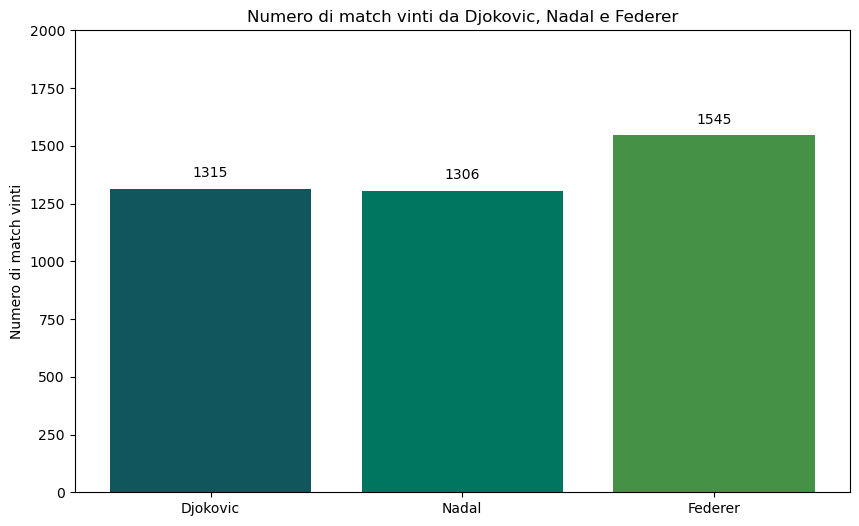

In [170]:
#Match vinti da Djokovic, Nadal e Federer

plt.figure(figsize=(10, 6)) 
plt.bar(['Djokovic', 'Nadal', 'Federer'], [djokovic.shape[0], nadal.shape[0], federer.shape[0]], color=colors)
plt.ylabel('Numero di match vinti')
plt.title('Numero di match vinti da Djokovic, Nadal e Federer')

plt.ylim(0, 2000)

for i, v in enumerate([djokovic.shape[0], nadal.shape[0], federer.shape[0]]):
    plt.text(i, v + 50, str(v), color='black', ha='center')

    
plt.show()



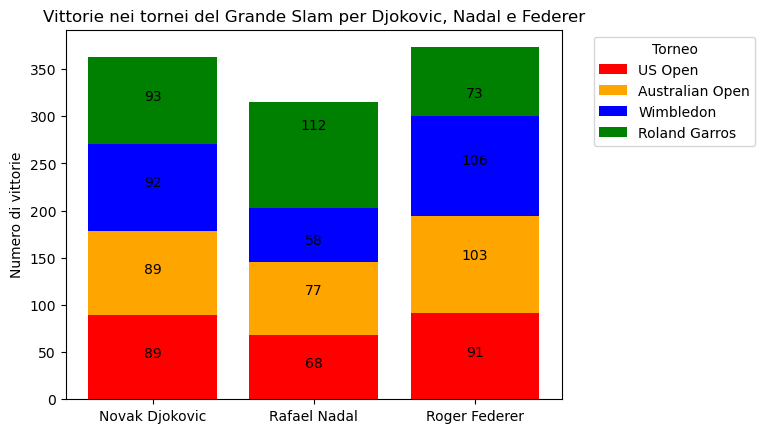

In [171]:
# Numero di slam vinti da Djokovic, Nadal e Federer

total_grand_slam_wins = atp_matches[(atp_matches['winner_name'].isin(['Novak Djokovic', 'Rafael Nadal', 'Roger Federer'])) & atp_matches['tourney_level'].isin(['G'])]
slams_by_tourney = total_grand_slam_wins.groupby(['winner_name', 'tourney_name']).size().reset_index(name='count')

players = ['Novak Djokovic', 'Rafael Nadal', 'Roger Federer']
us_open_wins = [slams_by_tourney[(slams_by_tourney['winner_name'] == player) & (slams_by_tourney['tourney_name'] == 'US Open')]['count'].values[0] for player in players]
aus_open_wins = [slams_by_tourney[(slams_by_tourney['winner_name'] == player) & (slams_by_tourney['tourney_name'] == 'Australian Open')]['count'].values[0] for player in players]
wimbledon_wins = [slams_by_tourney[(slams_by_tourney['winner_name'] == player) & (slams_by_tourney['tourney_name'] == 'Wimbledon')]['count'].values[0] for player in players]
roland_garros_wins = [slams_by_tourney[(slams_by_tourney['winner_name'] == player) & (slams_by_tourney['tourney_name'] == 'Roland Garros')]['count'].values[0] for player in players]

colors = {'Wimbledon': 'blue', 'US Open': 'red', 'Roland Garros': 'green', 'Australian Open': 'orange'}
plt.bar(players, us_open_wins, label='US Open', color=colors['US Open'])
plt.bar(players, aus_open_wins, label='Australian Open',bottom=us_open_wins, color=colors['Australian Open'])
plt.bar(players, wimbledon_wins, label='Wimbledon', bottom=[i+j for i,j in zip(us_open_wins, aus_open_wins)], color=colors['Wimbledon'])
plt.bar(players, roland_garros_wins, label='Roland Garros', bottom=[i+j+k for i,j,k in zip(us_open_wins, aus_open_wins, wimbledon_wins)], color=colors['Roland Garros'])

for i, v in enumerate(us_open_wins):
    plt.text(i, v/2, str(v), color='black', ha='center')

for i, v in enumerate(aus_open_wins):
    plt.text(i, v + us_open_wins[i]/2, str(v), color='black', ha='center')

for i, v in enumerate(wimbledon_wins):
    plt.text(i, v + us_open_wins[i] + aus_open_wins[i]/2, str(v), color='black', ha='center')

for i, v in enumerate(roland_garros_wins):
    plt.text(i, v + us_open_wins[i] + aus_open_wins[i] + wimbledon_wins[i]/2, str(v), color='black', ha='center')


plt.legend(title='Torneo', loc='best', bbox_to_anchor=(1.05, 1))
plt.ylabel('Numero di vittorie')
plt.title('Vittorie nei tornei del Grande Slam per Djokovic, Nadal e Federer')
plt.show()



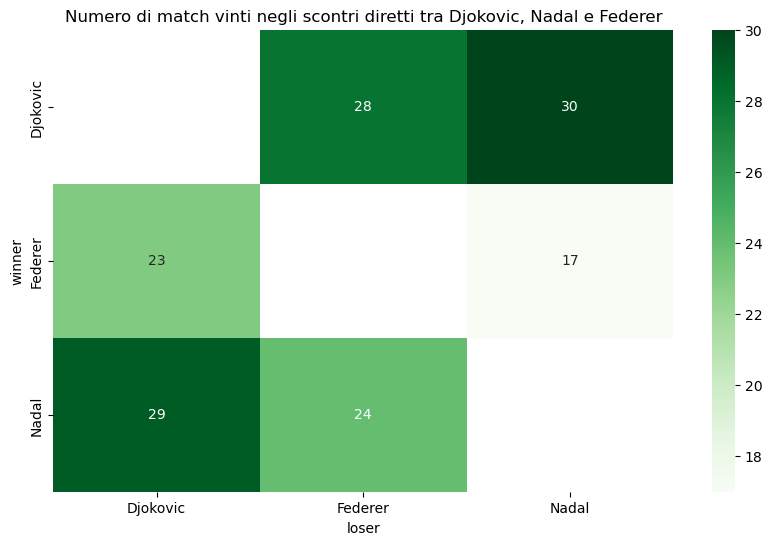

In [172]:
# Heatmap che mostra il numero di match vinti negli scontri diretti tra Djokovic, Nadal e Federer

djokovic_nadal = atp_matches[((atp_matches['winner_name'] == 'Novak Djokovic') & (atp_matches['loser_name'] == 'Rafael Nadal')) | ((atp_matches['winner_name'] == 'Rafael Nadal') & (atp_matches['loser_name'] == 'Novak Djokovic'))]
djokovic_federer = atp_matches[((atp_matches['winner_name'] == 'Novak Djokovic') & (atp_matches['loser_name'] == 'Roger Federer')) | ((atp_matches['winner_name'] == 'Roger Federer') & (atp_matches['loser_name'] == 'Novak Djokovic'))]
nadal_federer = atp_matches[((atp_matches['winner_name'] == 'Rafael Nadal') & (atp_matches['loser_name'] == 'Roger Federer')) | ((atp_matches['winner_name'] == 'Roger Federer') & (atp_matches['loser_name'] == 'Rafael Nadal'))]

djokovic_nadal['winner'] = np.where(djokovic_nadal['winner_name'] == 'Novak Djokovic', 'Djokovic', 'Nadal')
djokovic_federer['winner'] = np.where(djokovic_federer['winner_name'] == 'Novak Djokovic', 'Djokovic', 'Federer')
nadal_federer['winner'] = np.where(nadal_federer['winner_name'] == 'Rafael Nadal', 'Nadal', 'Federer')

djokovic_nadal['loser'] = np.where(djokovic_nadal['loser_name'] == 'Novak Djokovic', 'Djokovic', 'Nadal')
djokovic_federer['loser'] = np.where(djokovic_federer['loser_name'] == 'Novak Djokovic', 'Djokovic', 'Federer')
nadal_federer['loser'] = np.where(nadal_federer['loser_name'] == 'Rafael Nadal', 'Nadal', 'Federer')

djokovic_nadal = djokovic_nadal.groupby(['winner', 'loser']).size().reset_index(name='count')
djokovic_federer = djokovic_federer.groupby(['winner', 'loser']).size().reset_index(name='count')
nadal_federer = nadal_federer.groupby(['winner', 'loser']).size().reset_index(name='count')

combined_df = pd.concat([djokovic_nadal, djokovic_federer, nadal_federer], ignore_index=True)
combined_df = combined_df.pivot(index='winner', columns='loser', values='count')

plt.figure(figsize=(10, 6))
sns.heatmap(combined_df, annot=True, cmap='Greens', fmt='g')
plt.title('Numero di match vinti negli scontri diretti tra Djokovic, Nadal e Federer')

plt.show()

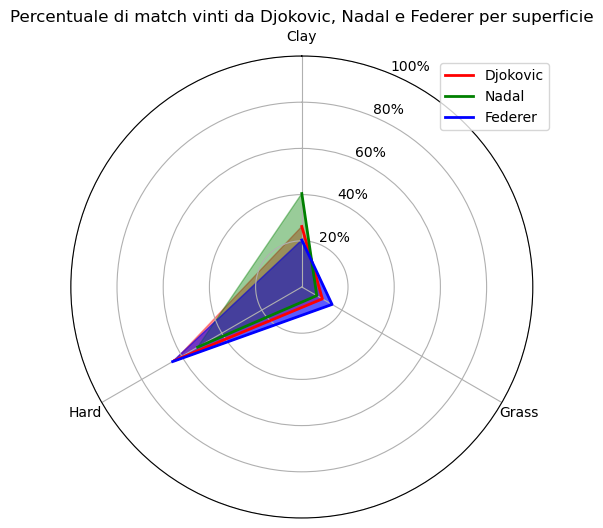

In [173]:
# radar char che mostra chi dei tre giocatori è il migliore in base alla surface

djokovic_surface = djokovic.groupby('surface').size().reset_index(name='count')
nadal_surface = nadal.groupby('surface').size().reset_index(name='count')
federer_surface = federer.groupby('surface').size().reset_index(name='count')

djokovic_surface = djokovic_surface[djokovic_surface['surface'] != 'Carpet']
nadal_surface = nadal_surface[nadal_surface['surface'] != 'Carpet']
federer_surface = federer_surface[federer_surface['surface'] != 'Carpet']

djokovic_surface['count'] = djokovic_surface['count'] / djokovic_surface['count'].sum()
nadal_surface['count'] = nadal_surface['count'] / nadal_surface['count'].sum()
federer_surface['count'] = federer_surface['count'] / federer_surface['count'].sum()

combined_df = pd.merge(djokovic_surface, nadal_surface, on='surface', how='outer', suffixes=('_djokovic', '_nadal'))
combined_df = pd.merge(combined_df, federer_surface, on='surface', how='outer')
combined_df = combined_df.rename(columns={'count': 'count_federer'})
combined_df.fillna(0, inplace=True)

combined_df['count_djokovic'] = combined_df['count_djokovic'] * 100
combined_df['count_nadal'] = combined_df['count_nadal'] * 100
combined_df['count_federer'] = combined_df['count_federer'] * 100

angles = np.linspace(0, 2 * np.pi, len(combined_df), endpoint=False).tolist()
combined_df = pd.concat([combined_df, combined_df.iloc[0:1]], ignore_index=True)
combined_df = combined_df[:-1]

fig, ax = plt.subplots(figsize=(10, 6), subplot_kw=dict(polar=True))
ax.fill(angles, combined_df['count_federer'], color='blue', alpha=0.4)

ax.plot(angles, combined_df['count_djokovic'], color='red', linewidth=2, linestyle='solid', label='Djokovic')
ax.fill(angles, combined_df['count_djokovic'], color='red', alpha=0.4)

ax.plot(angles, combined_df['count_nadal'], color='green', linewidth=2, linestyle='solid', label='Nadal')
ax.fill(angles, combined_df['count_nadal'], color='green', alpha=0.4)

ax.plot(angles, combined_df['count_federer'], color='blue', linewidth=2, linestyle='solid', label='Federer')
ax.fill(angles, combined_df['count_federer'], color='blue', alpha=0.4)

ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

ax.set_xticks(angles)
ax.set_xticklabels(combined_df['surface'].tolist())
plt.yticks([20, 40, 60, 80, 100], ['20%', '40%', '60%', '80%', '100%'])

plt.title('Percentuale di match vinti da Djokovic, Nadal e Federer per superficie')
plt.legend(loc='best', bbox_to_anchor=(1.05, 1))
plt.show()







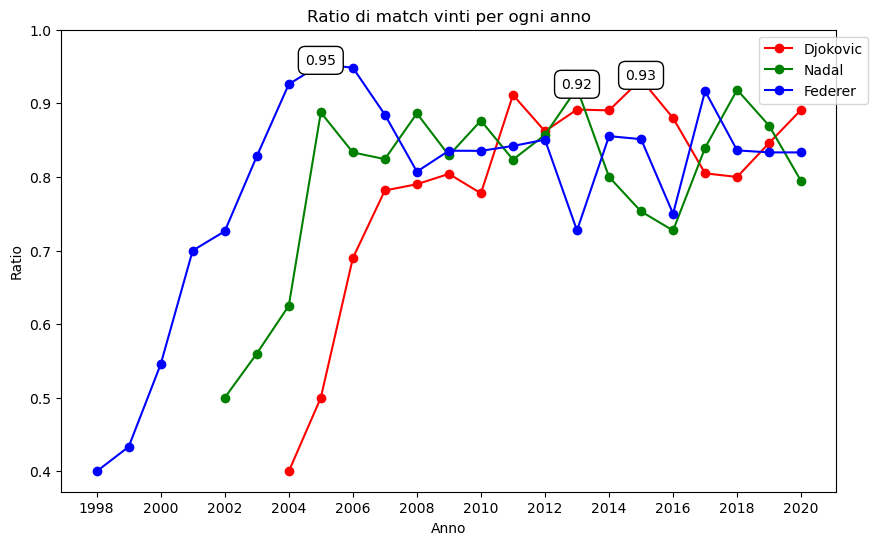

In [208]:
# grafo che mostra il ratio per ogni anno di Djokovic, Nadal e Federer
djokovic = atp_matches[(atp_matches['winner_name'] == 'Novak Djokovic') | (atp_matches['loser_name'] == 'Novak Djokovic')]
djokovic = djokovic[djokovic['tourney_date'].dt.year <= 2020]

djokovic_total = djokovic.groupby([djokovic['tourney_date'].dt.year]).size().reset_index(name='count')
djokovic_wins = djokovic[djokovic['winner_name'] == 'Novak Djokovic'].groupby([djokovic['tourney_date'].dt.year]).size().reset_index(name='count')

djokovic_ratio = pd.merge(djokovic_total, djokovic_wins, on='tourney_date', how='outer')
djokovic_ratio['ratio'] = djokovic_ratio['count_y'] / djokovic_ratio['count_x']

nadal = atp_matches[(atp_matches['winner_name'] == 'Rafael Nadal') | (atp_matches['loser_name'] == 'Rafael Nadal')]
nadal = nadal[nadal['tourney_date'].dt.year <= 2020]
nadal_total = nadal.groupby([nadal['tourney_date'].dt.year]).size().reset_index(name='count')
nadal_wins = nadal[nadal['winner_name'] == 'Rafael Nadal'].groupby([nadal['tourney_date'].dt.year]).size().reset_index(name='count')
nadal_ratio = pd.merge(nadal_total, nadal_wins, on='tourney_date', how='outer')
nadal_ratio['ratio'] = nadal_ratio['count_y'] / nadal_ratio['count_x']

federer = atp_matches[(atp_matches['winner_name'] == 'Roger Federer') | (atp_matches['loser_name'] == 'Roger Federer')]
federer = federer[federer['tourney_date'].dt.year <= 2020]
federer_total = federer.groupby([federer['tourney_date'].dt.year]).size().reset_index(name='count')
federer_wins = federer[federer['winner_name'] == 'Roger Federer'].groupby([federer['tourney_date'].dt.year]).size().reset_index(name='count')
federer_ratio = pd.merge(federer_total, federer_wins, on='tourney_date', how='outer')
federer_ratio['ratio'] = federer_ratio['count_y'] / federer_ratio['count_x']

# plottare in un unico grafico i tre ratio per ogni anno
plt.figure(figsize=(10, 6))
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:.0f}'.format(x)))
plt.plot(djokovic_ratio['tourney_date'], djokovic_ratio['ratio'], color='red', marker='o', label='Djokovic')
plt.plot(nadal_ratio['tourney_date'], nadal_ratio['ratio'], color='green', marker='o', label='Nadal')
plt.plot(federer_ratio['tourney_date'], federer_ratio['ratio'], color='blue', marker='o', label='Federer')
plt.xticks(np.arange(1998, 2021, 2))
plt.yticks(np.arange(0.4, 1.1, 0.1))
max_ratio_djokovic = djokovic_ratio[djokovic_ratio['ratio'] == djokovic_ratio['ratio'].max()]
plt.text(max_ratio_djokovic['tourney_date'], max_ratio_djokovic['ratio'], str(round(max_ratio_djokovic['ratio'].values[0], 2)), color='black', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'), ha='center')
max_ratio_nadal = nadal_ratio[nadal_ratio['ratio'] == nadal_ratio['ratio'].max()]
plt.text(max_ratio_nadal['tourney_date'], max_ratio_nadal['ratio'], str(round(max_ratio_nadal['ratio'].values[0], 2)), color='black', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'), ha='center')
max_ratio_federer = federer_ratio[federer_ratio['ratio'] == federer_ratio['ratio'].max()]
plt.text(max_ratio_federer['tourney_date'], max_ratio_federer['ratio'], str(round(max_ratio_federer['ratio'].values[0], 2)), color='black', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'), ha='center')
plt.xlabel('Anno')
plt.ylabel('Ratio')
plt.title('Ratio di match vinti per ogni anno')
plt.legend(loc='best', bbox_to_anchor=(1.05, 1))
plt.show()